<a href="https://colab.research.google.com/github/AysenGC/Projects/blob/main/Springboard_Capstone_3_Brain_Tumor_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

## 1.Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import os
import cv2
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

##2. Importing the datasets

In [3]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('/gdrive/MyDrive/Capstone3_Data/Capstone3_Datasets/Training/')
path_test = ('/gdrive/MyDrive/Capstone3_Data/Capstone3_Datasets/Testing/')

In [4]:
img_size = 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append(cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append(cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        test_labels.append(i)
        

In [5]:
train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [7]:
print("Shape of train: ",len(train_img)," and shape of test: ", len(test_img))

Shape of train:  2870  and shape of test:  394


In [8]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [9]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

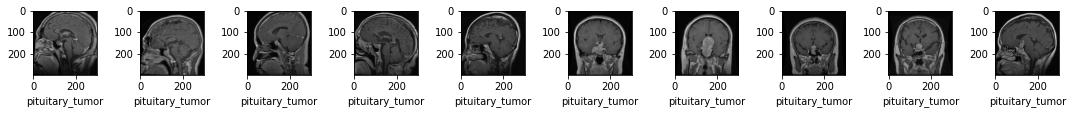

In [10]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<10:
        plt.subplot(1,10,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

##3. Modeling

In [11]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.build()
    

In [12]:
model.summary()

ValueError: ignored

In [ ]:
#Plotting the model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
#Reduce overfitting with dropout
https://cnvrg.io/cnn-tensorflow/

model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [ ]:
#The next step is to compile the model. The Sparse Categorical Cross-Entropy loss is used because the labels are not one-hot encoded. 
#In the event that you want to encode the labels, then you will have to use the Categorical Cross-Entropy loss function. 



#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
#Left to train for more epochs than needed, your model will most likely overfit on the training set. One of the ways to avoid that is to stop the training process when the model stops improving. 
This is done by monitoring the loss or the accuracy. In order to achieve that, the Keras EarlyStopping callback is used. 
By default, the callback monitors the validation loss. 
Patience is the number of epochs to wait before stopping the training process if there is no improvement in the model loss. 
This callback will be used at the training stage. 
The callbacks should be passed as a list, even if it’s just one callback.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]